# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. This project is not actual financial analysis, it is just a showcase of practical graphing and visualization skills in seaborn and plotly. We will see in this project data on major banks' stocks throughout the financial crisis of 2008. 

I imported pandas_datareader, pandas, numpy and datetime to handle date objects.

In [2]:

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

I got data using pandas datareader from Yahoo finance for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo  

I set a start time and an end time to set bounds on data, and created variables for all the specific banks for ease of use later.

In [3]:
start_time = datetime.datetime(2006, 1, 1)
end_time = datetime.datetime(2016, 1, 1)

In [4]:
#Bank of America
BAC = data.DataReader('BAC','yahoo',start_time, end_time)
#CitiGroup
C = data.DataReader('C','yahoo',start_time, end_time)
#Goldman Sachs 
GS = data.DataReader('GS','yahoo',start_time, end_time)
#JP Morgan Chase
JPM = data.DataReader('JPM','yahoo',start_time, end_time)
#Morgan Stanley
MS = data.DataReader('MS','yahoo',start_time, end_time)
#Wells Fargo Corp.
WFC = data.DataReader('WFC','yahoo',start_time, end_time)




In [5]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.523922
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.146645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.191933
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.139107
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.161732
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,16.071533
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.941246
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,16.080839


We see that each bank info has 6 columns:  high, low, open, close, volume (How many stocks available) and adj close (stock value AFTER paying dividends).  

I then created bank name headers and inserted them in the dataframe using pd.concat()

In [7]:
Bank_Name = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = Bank_Name)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.523922   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.146645   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.191933   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.139107   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.161732   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.006454  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  38.032536  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  38.136818  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  38.175922  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.580029  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.045347  
2006-01-04  31.530001  10870000.0  20.801256  
2006-01-05  31.495001  10158000.0  20.778162  
2006-01-06  31.680000   8403800.0  20.900213  
2006-01-09  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

I then added column headers for the 2 types of columns (Bank Names and Stock infos)

In [10]:
bank_stocks.columns.names = ['Bank Name','Stock Info']
bank_stocks.head()


Bank Name         BAC                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.523922   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.146645   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.191933   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.139107   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.161732   

Bank Name            C                                      ...         MS  \
Stock Info        High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

Bank Name                                          WFC                        \
Stock Info      Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.006454  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  38.032536  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  38.136818  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  38.175922  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.580029  31.825001  31.555000  31.674999   

Bank Name                                     
Stock Info      Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.045347  
2006-01-04  31.530001  10870000.0  20.801256  
2006-01-05  31.495001  10158000.0  20.778162  
2006-01-06  31.680000   8403800.0  20.900213  
2006-01-09  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

I then used a for loop to find the maximum closing price for each stock, and the minimum

In [14]:
for tick in Bank_Name:
    print(tick, bank_stocks[tick]['Close'].max())
    print(tick, bank_stocks[tick]['Close'].min)

BAC 54.900001525878906
BAC <bound method Series.min of Date
2006-01-03    47.080002
2006-01-04    46.580002
2006-01-05    46.639999
2006-01-06    46.570000
2006-01-09    46.599998
                ...    
2015-12-24    17.270000
2015-12-28    17.129999
2015-12-29    17.280001
2015-12-30    17.049999
2015-12-31    16.830000
Name: Close, Length: 2517, dtype: float64>
C 564.0999755859375
C <bound method Series.min of Date
2006-01-03    492.899994
2006-01-04    483.799988
2006-01-05    486.200012
2006-01-06    486.200012
2006-01-09    483.899994
                 ...    
2015-12-24     52.709999
2015-12-28     52.380001
2015-12-29     52.980000
2015-12-30     52.299999
2015-12-31     51.750000
Name: Close, Length: 2517, dtype: float64>
GS 247.9199981689453
GS <bound method Series.min of Date
2006-01-03    128.869995
2006-01-04    127.089996
2006-01-05    127.040001
2006-01-06    128.839996
2006-01-09    130.389999
                 ...    
2015-12-24    182.470001
2015-12-28    181.619995
201

We can see that all of the top stock prices were in 2006 before the crash, and the lowest point in the stock market crash was in 2015. 

I then created a new empty Dataframe to analyze the returns on each bank stock.  
This was done by iterating through each bank set to find the % daily change in stock price using the pct_change() method. The first column is NAN since it is the first day of the stock (there is no percentage change when the previous value is non existent)

In [15]:
returns = pd.DataFrame()

In [17]:
for name in Bank_Name:
    returns[name + ' Return'] = bank_stocks[name]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


I then created pairplot diagrams to see the change in stock returns. I removed the first NAN row due to values being null

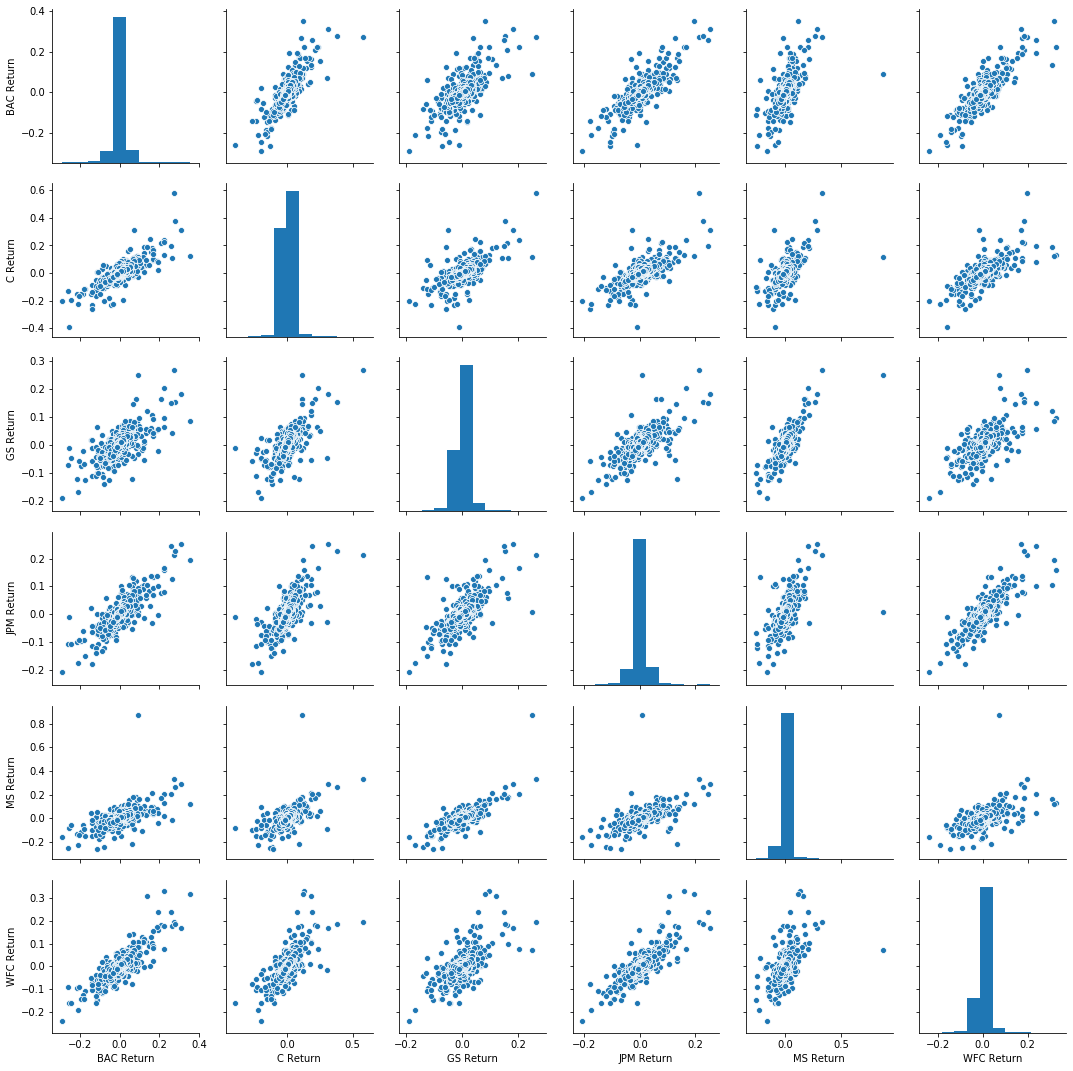

In [18]:
import seaborn as sns
sns.pairplot(data=returns[1:])

Through the histograms, we see that most of the plots hover around 0 or negative return.  
We also see through the scatter plots that all of the stocks have similar relationships to each other (When one has poor returns, the others do too). This is a sign of a financial crisis.  
I then found the dates of the lowest returns. These happened to be all in 2008 or 2009, around the time of the financial crisis. 

In [19]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [20]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

I then found the standard deviation of all the bank stocks. JPM and GS have a lower std than the rest, so seem to be less risky stocks over that time period

In [21]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

I then created a dataset for 2015 only, and found the standard deviations, which seemed to be much lower than the average (a possible sign of recovery from the market crash)

In [22]:
fifteen_returns = returns.loc['2015-01-01':'2015-12-31']
print(fifteen_returns)
fifteen_returns.std()


            BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2015-01-02    0.000559  0.002772   0.002992   -0.001438  -0.002320   -0.002189
2015-01-05   -0.029050 -0.031515  -0.031223   -0.031045  -0.031258   -0.027422
2015-01-06   -0.029919 -0.035205  -0.020229   -0.025929  -0.028800   -0.020865
2015-01-07    0.004745  0.009270   0.014903    0.001526   0.014278    0.005951
2015-01-08    0.020661  0.015048   0.015965    0.022346   0.014889    0.022137
...                ...       ...        ...         ...        ...         ...
2015-12-24   -0.004037  0.001520  -0.002624   -0.001948  -0.003681   -0.003997
2015-12-28   -0.008107 -0.006261  -0.004658   -0.003303  -0.009544   -0.002554
2015-12-29    0.008757  0.011455   0.010516    0.010395   0.011812    0.011156
2015-12-30   -0.013310 -0.012835  -0.008282   -0.007157  -0.009831   -0.007235
2015-12-31   -0.012903 -0.010516  -0.009780   -0.008

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

I then created a distribution plot for Morgan Stanley returns in 2015 and CitiGroup in 2008. 

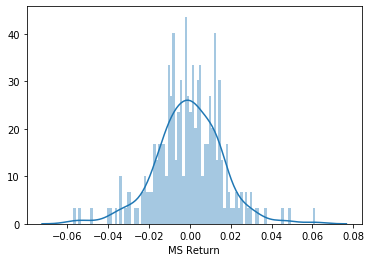

In [23]:
sns.distplot(fifteen_returns['MS Return'], bins = 100)

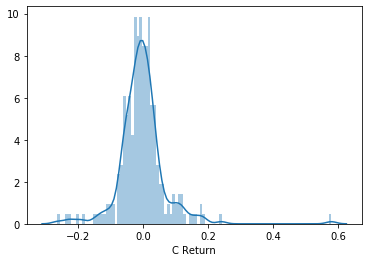

In [24]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins = 100)

Seeing from this data, Morgan Stanley has a fairly stable return in 2015, whith most bins distributed within 0.02.  
The  distribution is almost 10 times as stretched out (-0.2 to 0.6). This means the stock was very volatile in 2008. 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

Used Pyplot to create a plot of the closing prices of stocks from 2006 to 2016. We see that CitiGroup completely crashed in 2009 and never really recovered. GoldMan Sachs crashed in 08/09, but recovered to be the most expensive fo the stocks in 2010 onwards. 

In [32]:

fig = bank_stocks.xs(key = 'Close', axis = 1,level= 'Stock Info').iplot()

I then plotted the 30 day rolling average vs the closing price daily throughout 2008, which shows a strong correlation between the 2. 

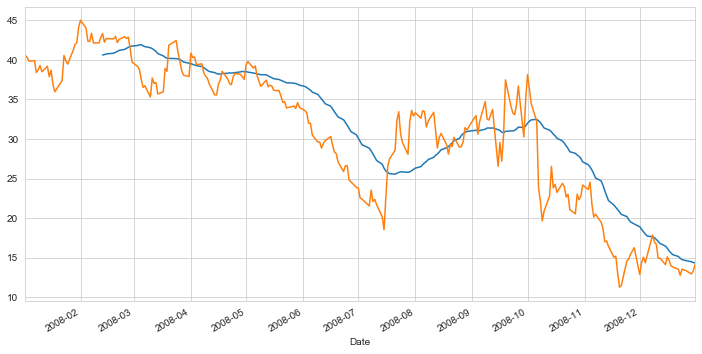

In [34]:
plt.figure(figsize = (12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot()
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot()

I then created a correlation dataset and a heatmap. 

In [35]:
correlation = bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').corr()
print(correlation)


Bank Name       BAC         C        GS       JPM        MS       WFC
Bank Name                                                            
BAC        1.000000  0.971516  0.550898  0.103874  0.944218  0.008542
C          0.971516  1.000000  0.434123  0.003515  0.933609 -0.068536
GS         0.550898  0.434123  1.000000  0.685286  0.683792  0.499897
JPM        0.103874  0.003515  0.685286  1.000000  0.250427  0.940269
MS         0.944218  0.933609  0.683792  0.250427  1.000000  0.131835
WFC        0.008542 -0.068536  0.499897  0.940269  0.131835  1.000000


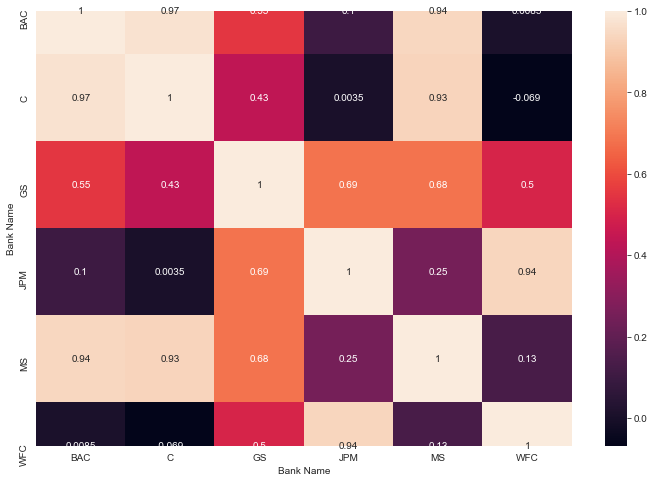

In [36]:
plt.figure(figsize = (12,8))
sns.heatmap(data = correlation, annot = True)

This heatmap is hard to interpret, so I created a clustermap, which grouped C, BAC, MS together and WFC, JPM and GS together with strong correlations to one another

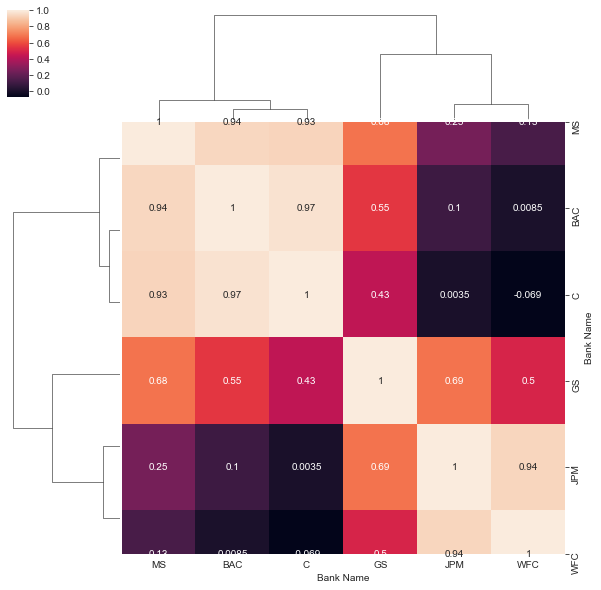

In [37]:
sns.clustermap(data = correlation, annot = True)

I then created a 2105 data set for Bank of America, and a candle plot, which shows the opening price, closing price, high and low for every day of the year. Red candles means a loss, green candles means an increase in price. 

In [38]:

BAC_2015 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
print(BAC_2015)

                 Open       High        Low      Close
Date                                                  
2015-01-02  17.990000  18.030001  17.680000  17.900000
2015-01-05  17.790001  17.809999  17.290001  17.379999
2015-01-06  17.420000  17.440001  16.780001  16.860001
2015-01-07  17.139999  17.180000  16.870001  16.940001
2015-01-08  17.160000  17.340000  17.100000  17.290001
...               ...        ...        ...        ...
2015-12-24  17.320000  17.379999  17.219999  17.270000
2015-12-28  17.219999  17.230000  16.980000  17.129999
2015-12-29  17.250000  17.350000  17.160000  17.280001
2015-12-30  17.200001  17.240000  17.040001  17.049999
2015-12-31  17.010000  17.070000  16.830000  16.830000

[252 rows x 4 columns]


In [39]:
BAC_2015.iplot(kind='candle')

# Closing price and SMA for Morgan Stanley in 2015. 

In [40]:
MS_2015 = MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma')


# Bollinger band plot graphing Closing price, SMA, Upper price and Lower price for Bank of America Stock in 2015. 

In [41]:
BAC_2015['Close'].ta_plot(study ='boll')

## That's it!